# Ch-08. 그래프 만들기
## 08-2. 산점도 - 변수간 관계 표현하기 (skip 08-1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
os.chdir('C:\\Users\\James\\Documents\\GitHub\\Doit_Python/Data')
os.getcwd()

'C:\\Users\\James\\Documents\\GitHub\\Doit_Python\\Data'

In [3]:
mpg_raw = pd.read_csv('mpg.csv')
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### - (p.199) 산점도

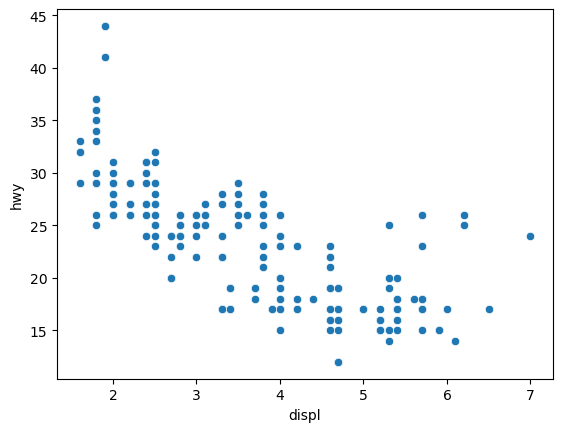

In [7]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy');

#### (1) 축 범위 설정

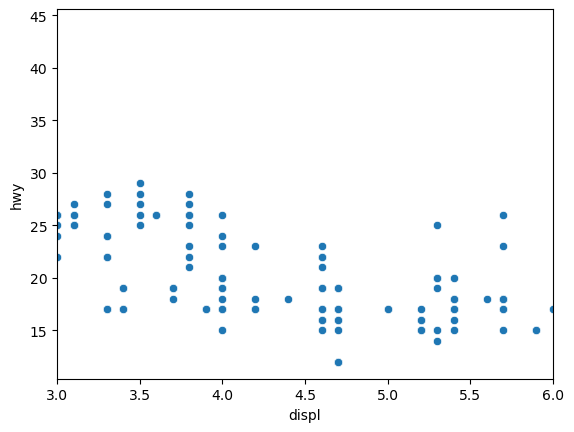

In [8]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = (3, 6));

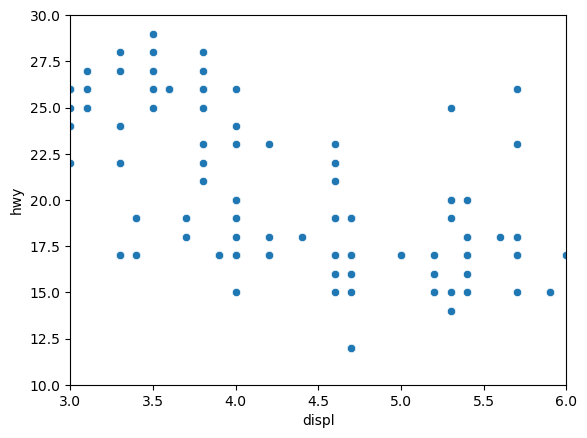

In [9]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = (3, 6), ylim = (10, 30));

#### (2) 종류별로 표식 색깔 변경

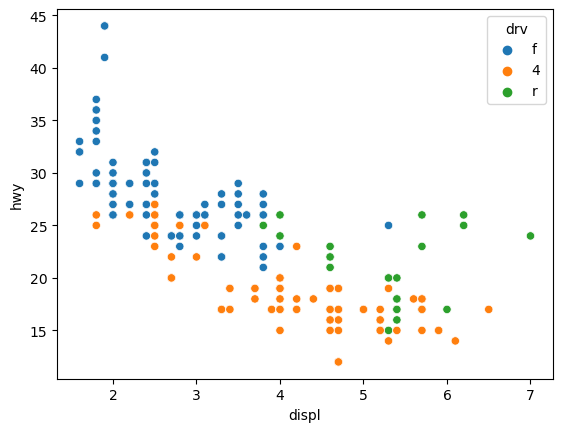

In [10]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv');

#### (3) 그래프 이미지 저장
##### * shift + 우클릭->다른이름으로 저장
##### * shift + 우클릭->이미지 복사->붙여넣기

### - (p.203) 그래프 설정 바꾸기

In [4]:
import matplotlib.pyplot as plt

In [48]:
# 해상도 - default 72
plt.rcParams.update({'figure.dpi' : '150'})

In [49]:
# 가로/세로 크기 - default [6, 4]
plt.rcParams.update({'figure.figsize' : [4, 4]})

In [50]:
# 글자 크기 - default 10
plt.rcParams.update({'font.size' : '15'})

In [51]:
# 폰트 - default sans-serif
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

In [52]:
# 한번에 변경
plt.rcParams.update({'figure.dpi' : '100',
                     'figure.figsize' : [6, 4],
                     'font.size' : '10',
                     'font.family' : 'sans-serif'})

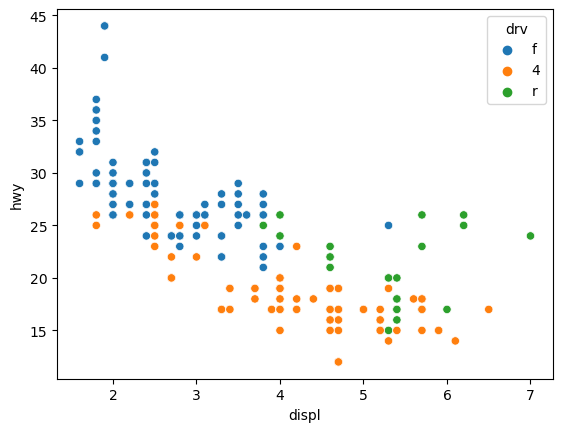

In [59]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv');

#### * 한글 변수
##### . (Windonws) Malgun Gothic
##### . (MacBook) AppleGothic

#### * 설정 되돌리기

In [58]:
# 1.
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

In [34]:
# 2.
plt.style.use('default')
%matplotlib inline

In [26]:
# 3.
import matplotlib
matplotlib.rcdefaults()
%matplotlib inline

### - (p.204) < 혼자서 해보기 >

#### * Q1.

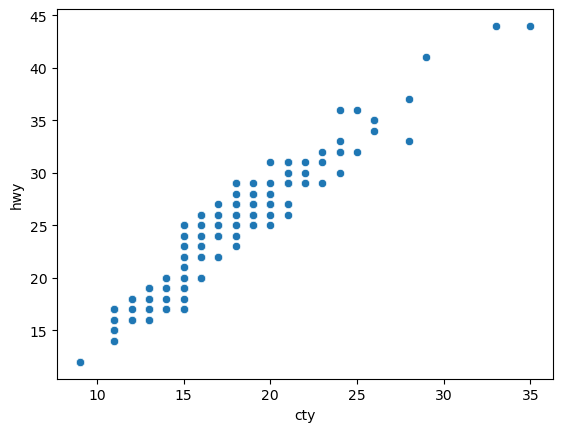

In [61]:
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy');

#### * Q2.

In [63]:
midwest_raw = pd.read_csv('midwest.csv')
midwest = midwest_raw.copy()
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


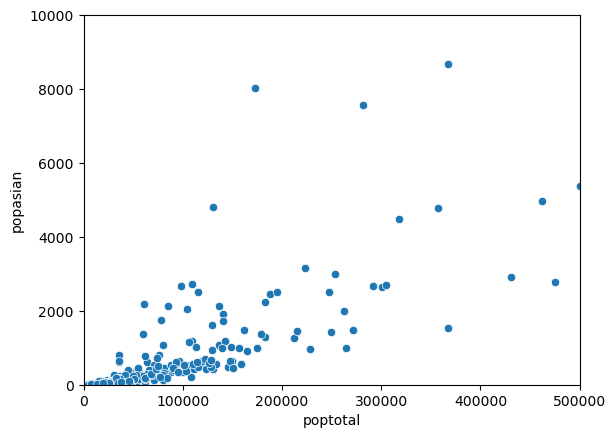

In [65]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian') \
   .set(xlim = (0, 500000), ylim = (0, 10000));

## 08-3. 막대 그래프 - 집단 간 차이 표현하기

### - (p.205) 평균 막대 그래프 만들기
#### (1) 집단별 평균표 만들기

In [66]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


#### (2) 그래프 만들기

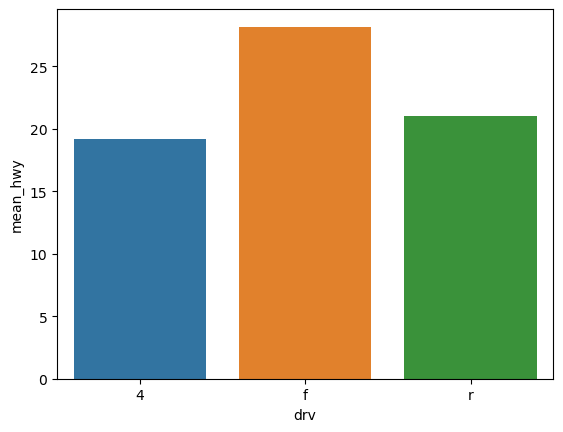

In [27]:
sns.barplot(data = df_mpg, x='drv', y='mean_hwy');

#### (3) 크기순으로 정렬하기

In [28]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

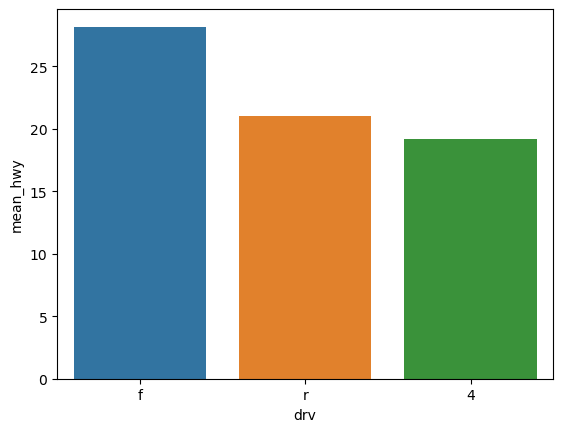

In [29]:
sns.barplot(data = df_mpg, x='drv', y='mean_hwy');

### - (p.208) 빈도 막대 그래프 만들기
#### (1) 집단별 빈도표 만들기

In [67]:
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


#### (2) 그래프 만들기

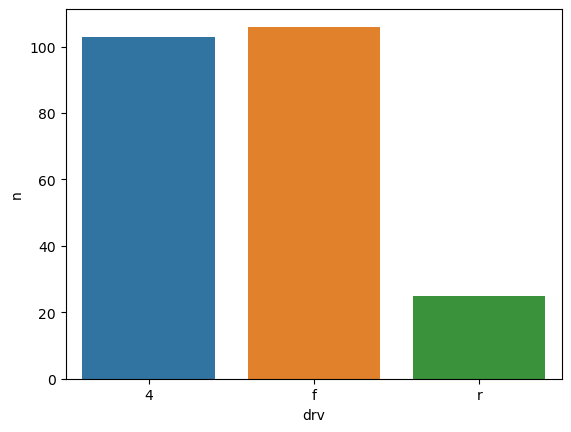

In [37]:
sns.barplot(data = df_mpg, x='drv', y='n');

#### (3) sns.countplot()

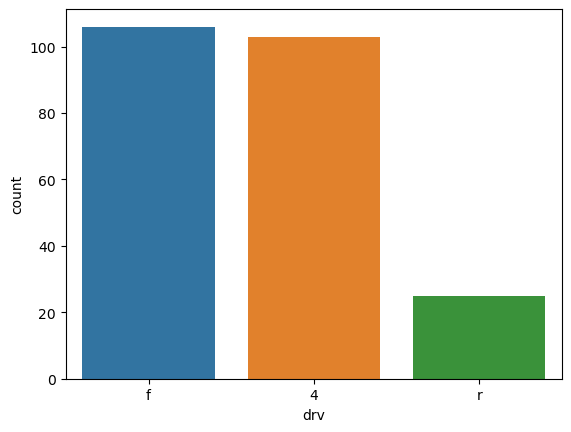

In [68]:
# sns.countplot() 을 이용하면 df.groupby().agg() 없이 바로 barplot 그릴 수 있음
sns.countplot(data = mpg, x='drv');

#### (4) 막대 정렬하기

In [69]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [70]:
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [59]:
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

In [60]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

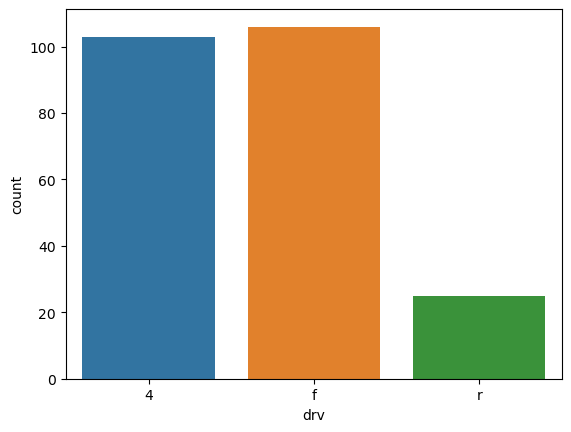

In [71]:
# 막대 순서 내가 정하기
sns.countplot(data = mpg, x='drv', order = ['4', 'f', 'r']);

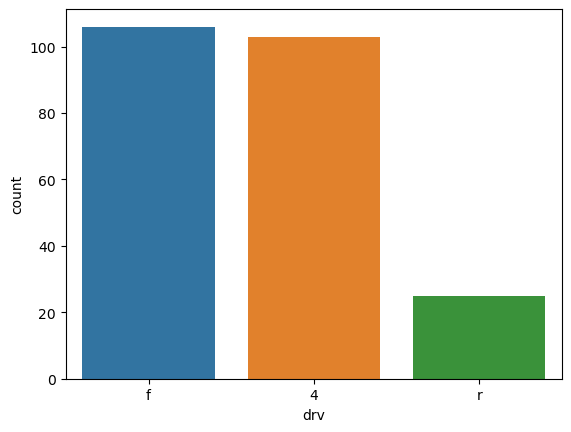

In [74]:
# 내림차순으로 정렬
order_desc = mpg['drv'].value_counts().index
sns.countplot(data = mpg, x='drv', order = order_desc);

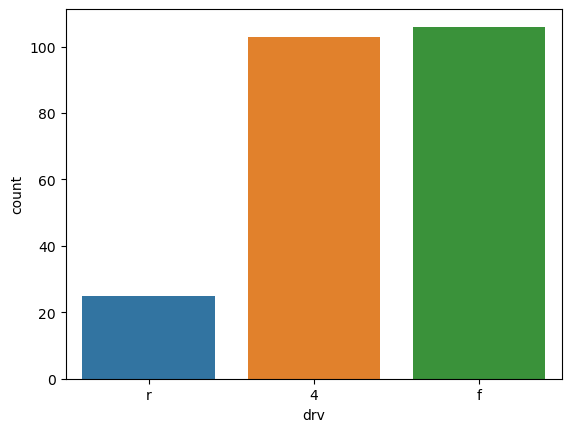

In [73]:
# 오름차순으로 정렬
order_asc = mpg['drv'].value_counts().sort_values().index
sns.countplot(data = mpg, x = 'drv', order = order_asc);

### - (p.211) < 혼자서 해보기 >

#### * Q1.

In [75]:
mpg_raw = pd.read_csv('mpg.csv')
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [81]:
mpg_suv = mpg.query('category == "suv"') \
             .groupby('manufacturer', as_index = False) \
             .agg(mean_cty = ('cty', 'mean')) \
             .sort_values('mean_cty', ascending = False) \
             .head()
mpg_suv

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


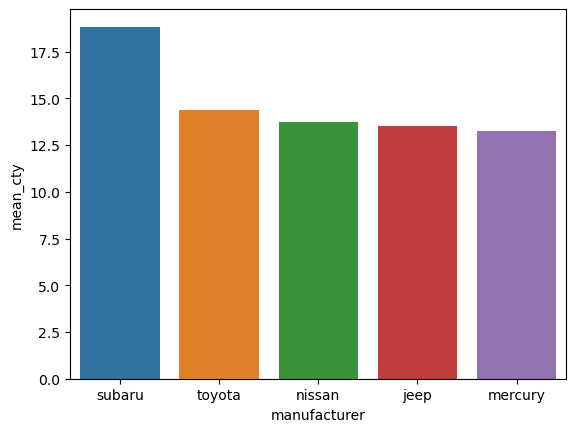

In [83]:
sns.barplot(data = mpg_suv, x = 'manufacturer', y = 'mean_cty');

In [85]:
# cf. 상위 5개 제조사에 대하여 오름차순으로 막대 정렬
mpg_suv_asc = mpg_suv.sort_values('mean_cty', ascending = True)
mpg_suv_asc

,manufacturer,mean_cty
6,mercury,13.250000
3,jeep,13.500000
7,nissan,13.750000
9,toyota,14.375000
8,subaru,18.833333


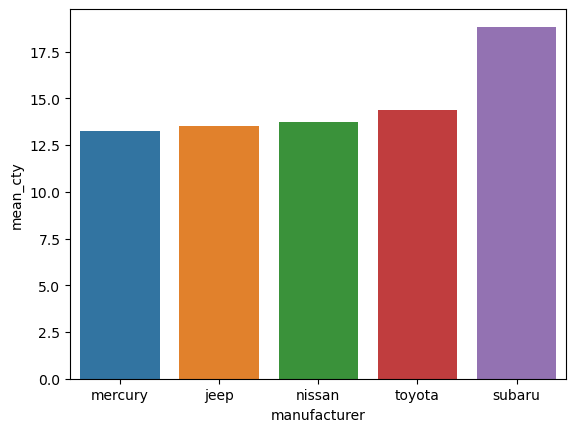

In [86]:
sns.barplot(data = mpg_suv_asc, x = 'manufacturer', y = 'mean_cty');

#### * Q2.

In [91]:
# 1. sns.barplot()
mpg_cat = mpg.groupby('category', as_index = False) \
             .agg(n = ('category', 'count')) \
             .sort_values('n', ascending = False)
mpg_cat

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


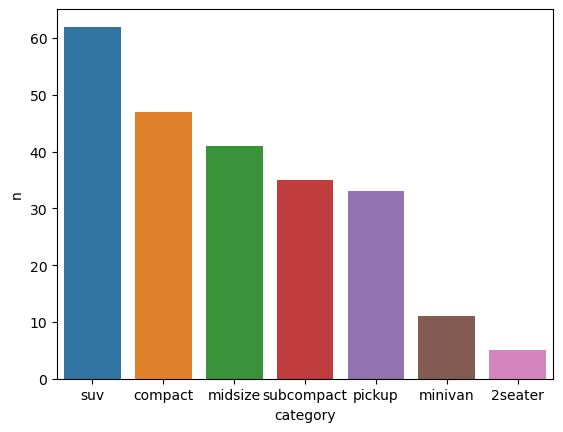

In [92]:
sns.barplot(data = mpg_cat, x = 'category', y = 'n');

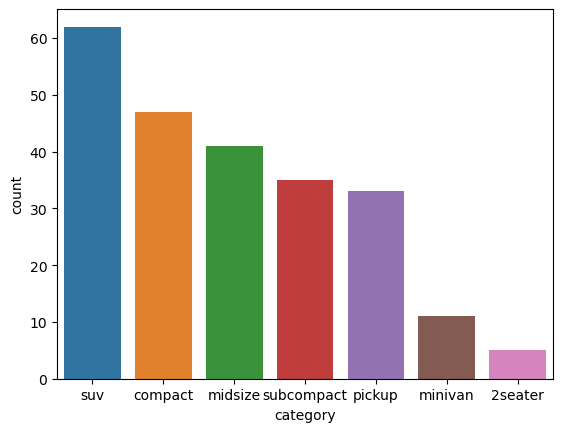

In [88]:
# 2. sns.countplot()
order_desc = mpg['category'].value_counts().index
sns.countplot(data = mpg, x = 'category', order = order_desc);

## 08-4. 선 그래프 - 시계열 그래프
### - (p.212) 시계열 그래프 만들기

In [93]:
economics_raw = pd.read_csv('economics.csv')
economics = economics_raw.copy()
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [94]:
economics.shape

(574, 6)

In [95]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [97]:
economics.describe(include = 'all')

,date,pce,pop,psavert,uempmed,unemploy
count,574,574.000000,574.000000,574.000000,574.000000,574.000000
unique,574,NaN,NaN,NaN,NaN,NaN
top,1967-07-01,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,NaN,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,NaN,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,NaN,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,NaN,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,NaN,7626.325000,290290.750000,11.100000,9.100000,8685.500000


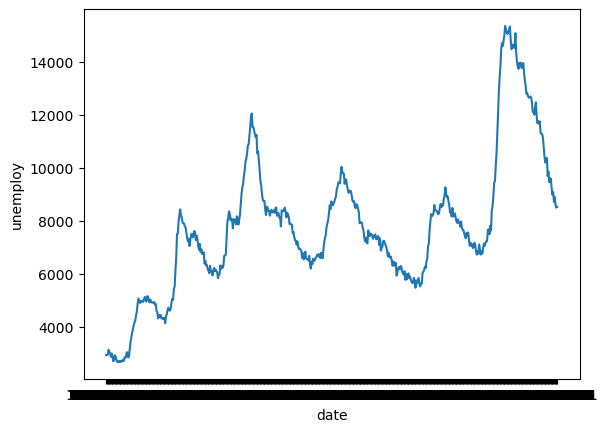

In [98]:
sns.lineplot(data=economics, x='date', y='unemploy');

#### * x축에 연도만 표시하기
##### (1) 날짜 시간 타입 변수 만들기 (pd.to_datetime())

In [104]:
# 1
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [106]:
# 2
economics = economics_raw.copy()
economics = economics.assign(date2 = lambda x: pd.to_datetime(x['date']))
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [107]:
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


##### (2) 연/월/일 추출 (df.dt.year/month/day) 

In [108]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [109]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [110]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

##### (3) 연도 변수 만들기

In [111]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


##### (4) x축에 연도 표시하기

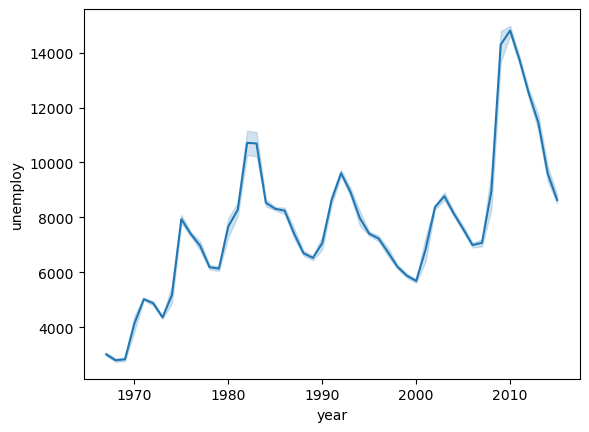

In [112]:
sns.lineplot(data=economics, x='year', y='unemploy');

#### * 신뢰구간(Confidence Interval) 제거

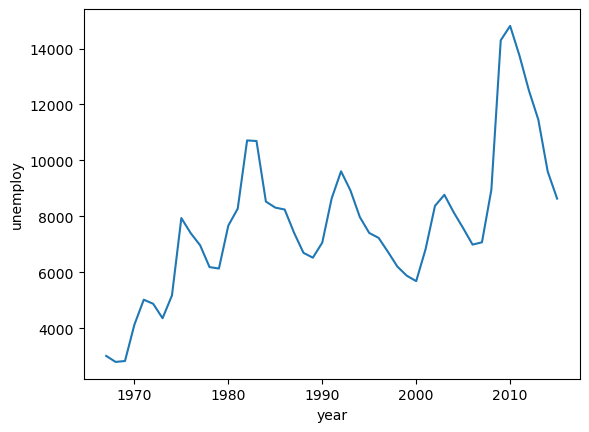

In [121]:
sns.lineplot(data=economics, x='year', y='unemploy', ci=None);

### - (p.217) < 혼자서 해보기 >

In [114]:
economics_raw = pd.read_csv('economics.csv')
economics = economics_raw.copy()
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


#### * Q1.

In [115]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [116]:
economics['date2'] = pd.to_datetime(economics['date'])
economics['year'] = economics['date2'].dt.year

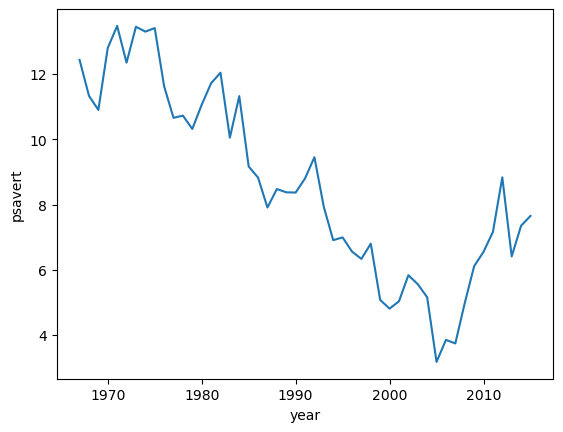

In [117]:
sns.lineplot(data = economics, x = 'year', y = 'psavert', ci = None);

#### * Q2.

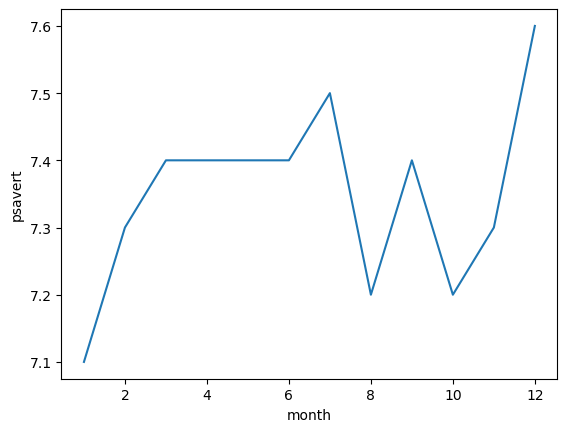

In [119]:
economics['month'] = economics['date2'].dt.month
economics_2014 = economics.query('year == 2014')
sns.lineplot(data = economics_2014, x = 'month', y = 'psavert', ci = None);

## 08-5. 상자그림 - 집단 간 분포 차이
### - (p.218) 상자 그림 만들기

In [122]:
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


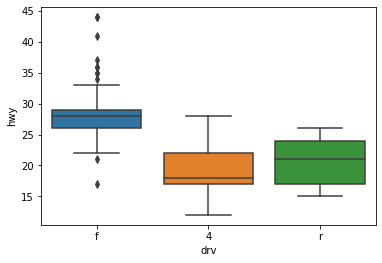

In [6]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy');

### - (p.220) < 혼자서 해보기 >

In [123]:
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [129]:
df_mpg = mpg.query('category in ["compact", "subcompact", "suv"]')
df_mpg['category'].unique()

array(['compact', 'suv', 'subcompact'], dtype=object)

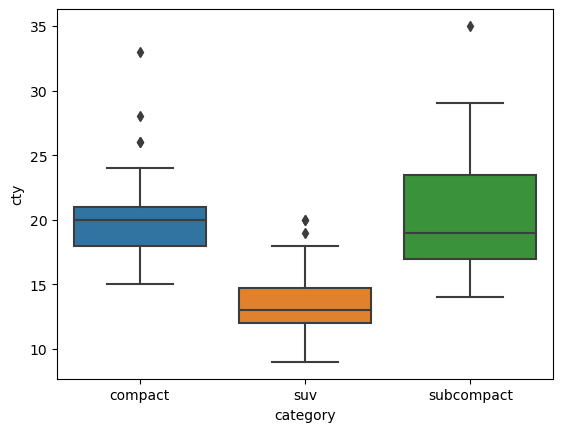

In [130]:
sns.boxplot(data = df_mpg, x = 'category', y = 'cty');

## End.